<a href="https://colab.research.google.com/github/JoshuaOmondi/Data-Projects/blob/master/marketing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preparation


In [ ]:
#load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Set the style of the plot
sns.set(style="whitegrid")

# load the dataset
df = pd.read_csv('bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [ ]:
# Summary statistics of numerical data
print(df.describe())

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


In [ ]:
# Check for any missing values
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


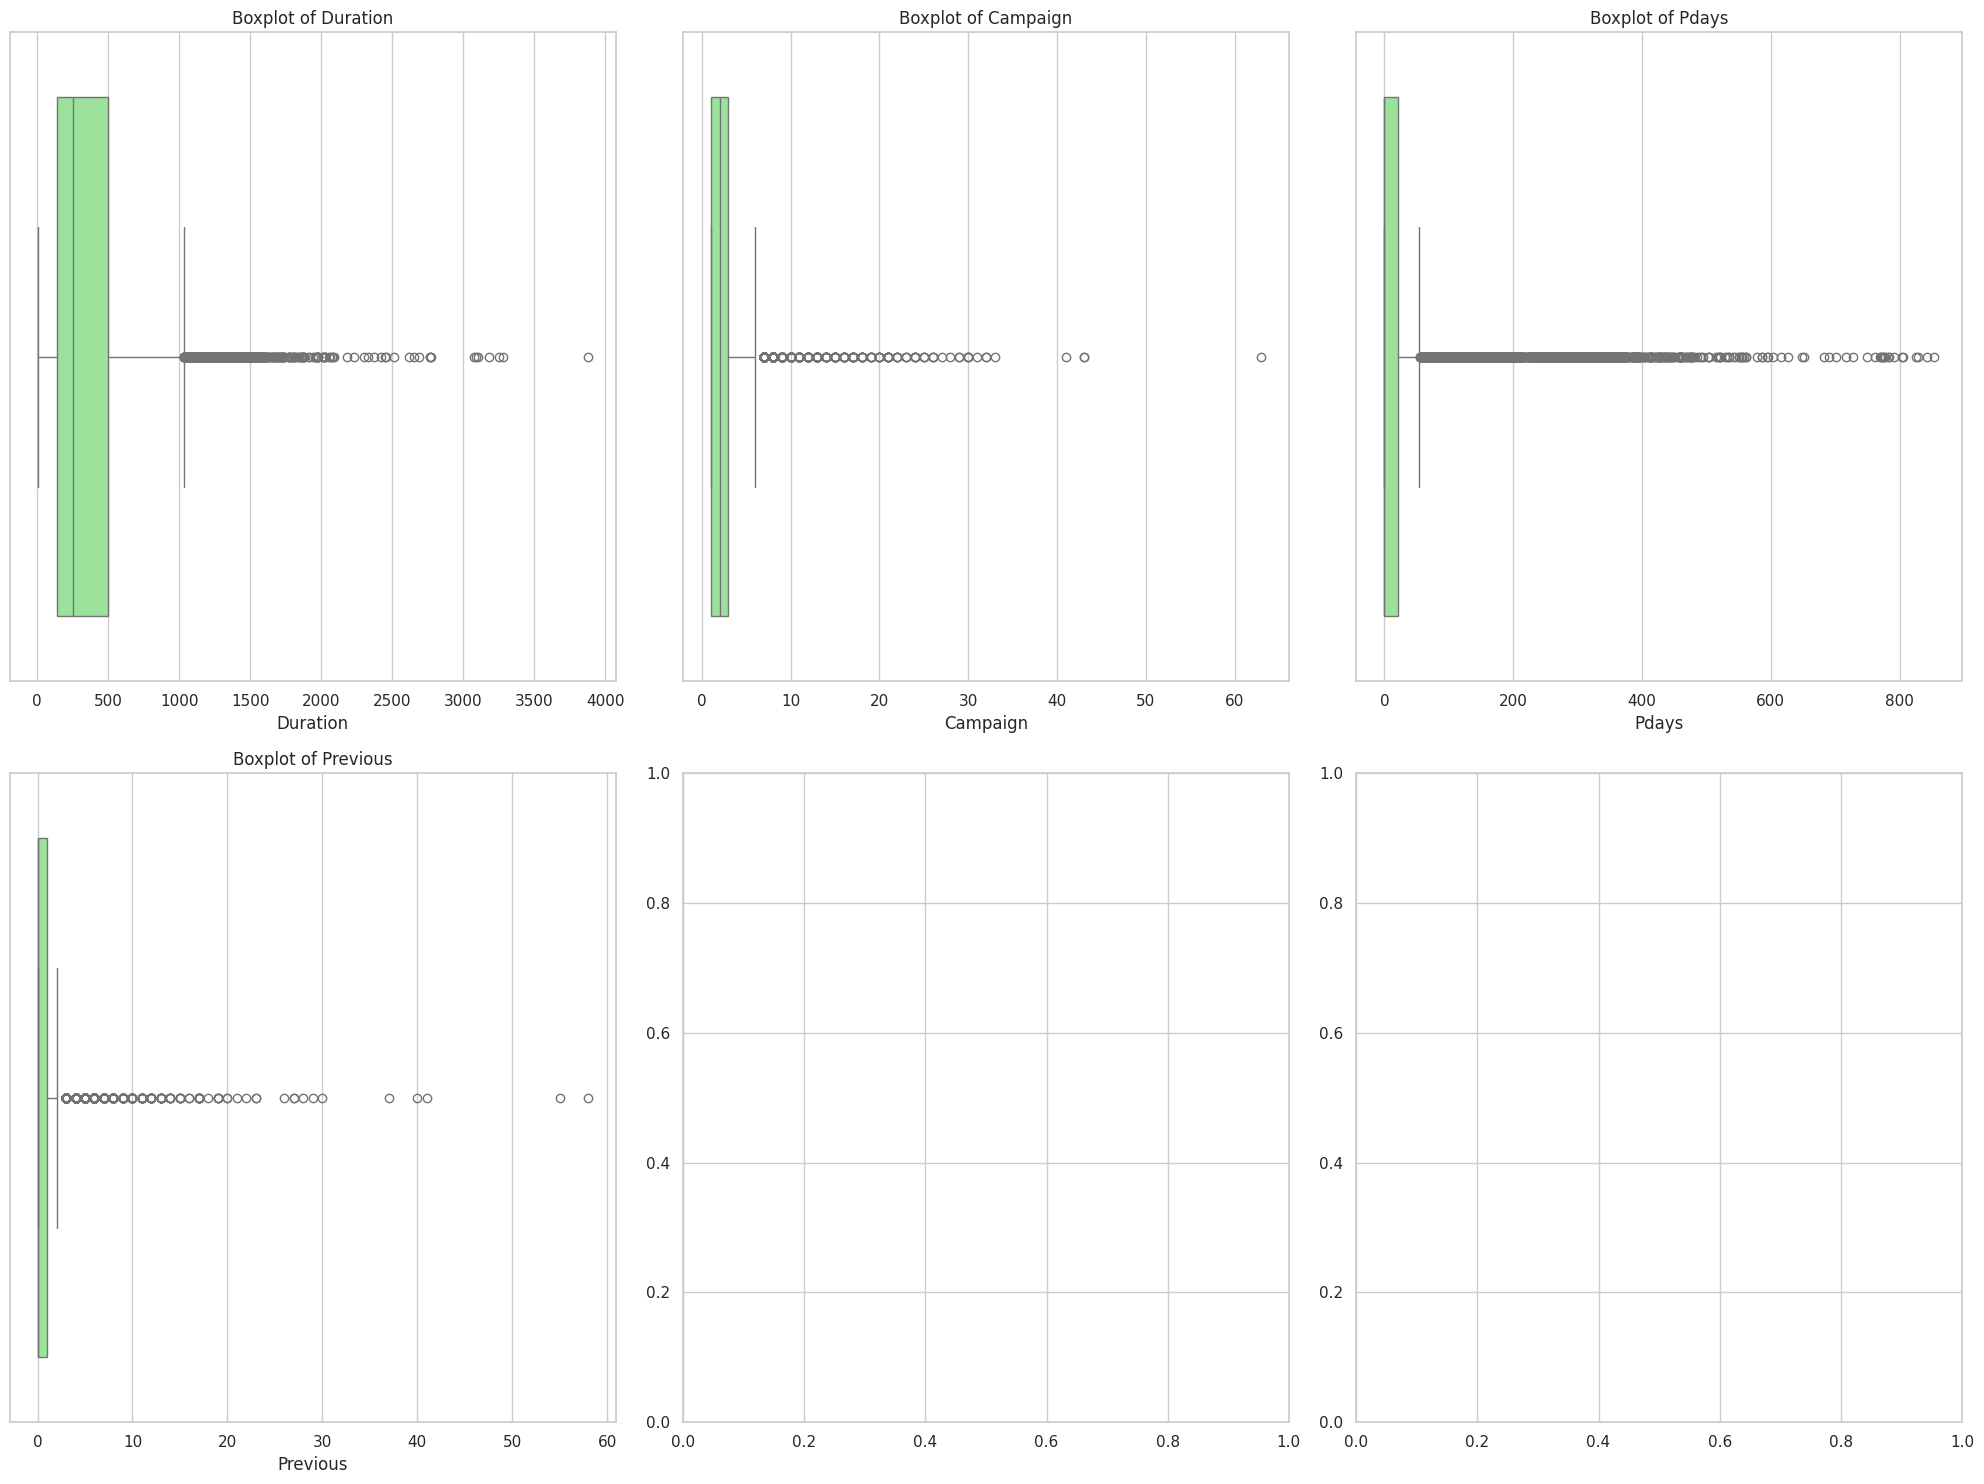

In [ ]:
#visualizing the distribution of numerical columns

sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

num_columns = ['duration', 'campaign', 'pdays', 'previous']

for i, num_column in enumerate(num_columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x=df[num_column], ax=axs[row, col], color='lightgreen')
    axs[row, col].set_title(f'Boxplot of {num_column.capitalize()}')
    axs[row, col].set_xlabel(num_column.capitalize())
    axs[row, col].set_ylabel('')

plt.tight_layout()
plt.show()


From the boxplots, we can see some columns like pdays, previous and campaign have outliers.

## **Exploratory Data Analysis**

The analysis will take two approaches. The first approach will be to find insights on the customers of the bank. The second is to find insights on the marketing efforts of the bank. Based on the results of the analysis, we'll try and see how the customer and marketing insights can help the CMO improve on the marketing strategy of the bank.

We'll start by analysing customer demographics. The goal is to try and get more insights on the customer base.
Which occupations do our customers have? Are most of them single, married, divorced? What are the levels of education of the customers? What is the age distribution of our customers? And last but not least, how do all these correlate with the subsription rates for term deposits?

As a next step, we'll group the customers by job, marital status and education. The goal is to calculate subscription rates per group. To do this, we'll need to first convert our deposit column from a categorical column to numerical column. We'll do this by converting the "Yes" and "No" to binary numbers 1 and 0, with 1 representing a customer who has subscribed to the term deposit and 0 representing a customer who has not subscribed to the term deposit.

### Customers by Occupation

In [ ]:
df['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

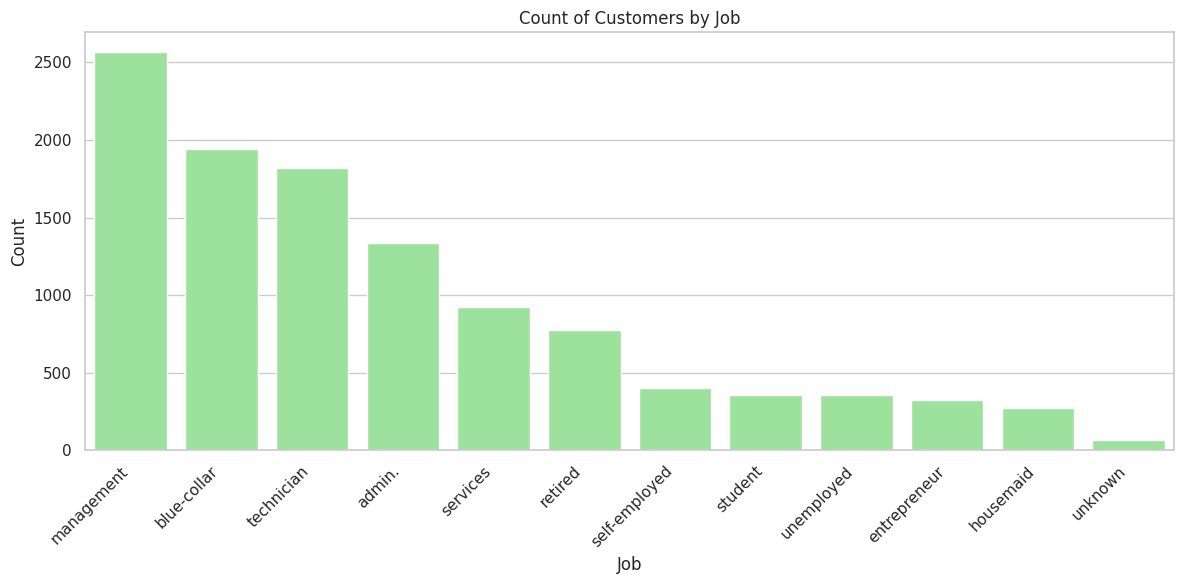

In [ ]:
#Visualize customers by occupation

# Calculate the count of customers by job and order them in descending order
job_counts = df['job'].value_counts().sort_values(ascending=False)

# Set the style of the plot
sns.set(style="whitegrid")

# Calculate the count of customers by job and order them in descending order
job_counts = df['job'].value_counts().sort_values(ascending=False)

# Plot the count of customers by job with seaborn
plt.figure(figsize=(12, 6))
sns.countplot(x='job', data=df, color='lightgreen', order=job_counts.index)
plt.title('Count of Customers by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Analyzing Term Deposit Subscriptions

In [ ]:
#check for the distribution of subscriptions
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

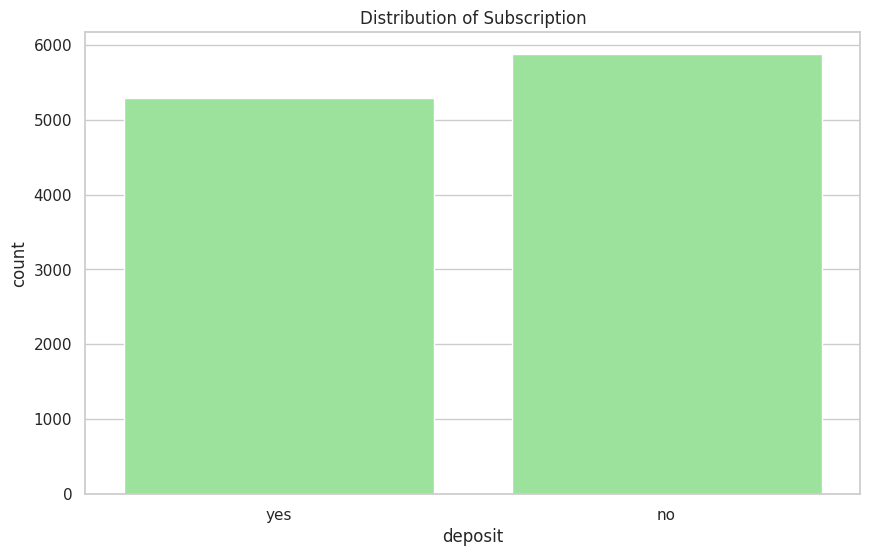

In [ ]:
#visualize the distribution of subscriptions

# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='deposit', data=df, color='lightgreen')
plt.title('Distribution of Subscription')
plt.show()

## **Marketing Insights**

Now that we have done some exploratory analysis of customers, we'll then look at campaign-specific measures. Are there any insights we can draw from monthly subscriptions? What is the impact of the previous campaign on subscriptions? We will then use the insights we obtain from these to help shape future marketing strategies.

As a next step, we want to group the customers and see how other factors like having a housing loan, defaulting on a loan or having any other type of loan affect subscription rates.

## How demographics affect subscription rates

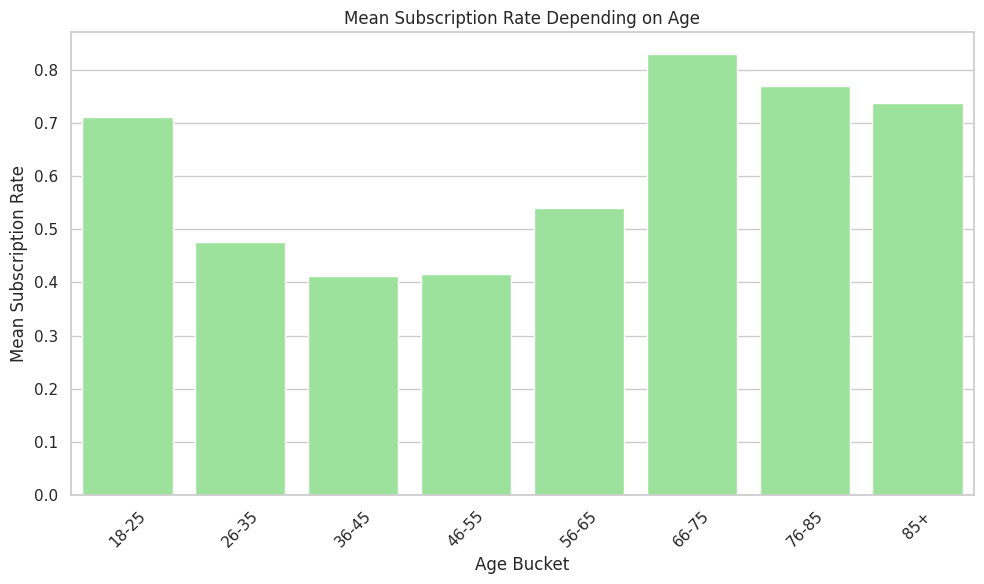

In [ ]:
# Define custom age bins
# Convert 'deposit' column to numerical
df['deposit_numerical'] = df['deposit'].map({'yes': 1, 'no': 0})

age_bins = [18, 26, 36, 46, 56, 66, 76, 86, np.inf]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '85+']

# Introduce new column 'age_bins' with custom age bins
df['age_bins'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Group by 'age_bins' and find average campaign outcome per age bucket
mean_deposit = df.groupby('age_bins')['deposit_numerical'].mean().reset_index()

# Plot as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='age_bins', y='deposit_numerical', data=mean_deposit, color='lightgreen')
plt.title('Mean Subscription Rate Depending on Age')
plt.xlabel('Age Bucket')
plt.ylabel('Mean Subscription Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Subscription Rates per Job:
              job  subscription_rate
0          admin.           0.473013
1     blue-collar           0.364198
2    entrepreneur           0.375000
3       housemaid           0.397810
4      management           0.507015
5         retired           0.663239
6   self-employed           0.461728
7        services           0.399783
8         student           0.747222
9      technician           0.460779
10     unemployed           0.565826
11        unknown           0.485714


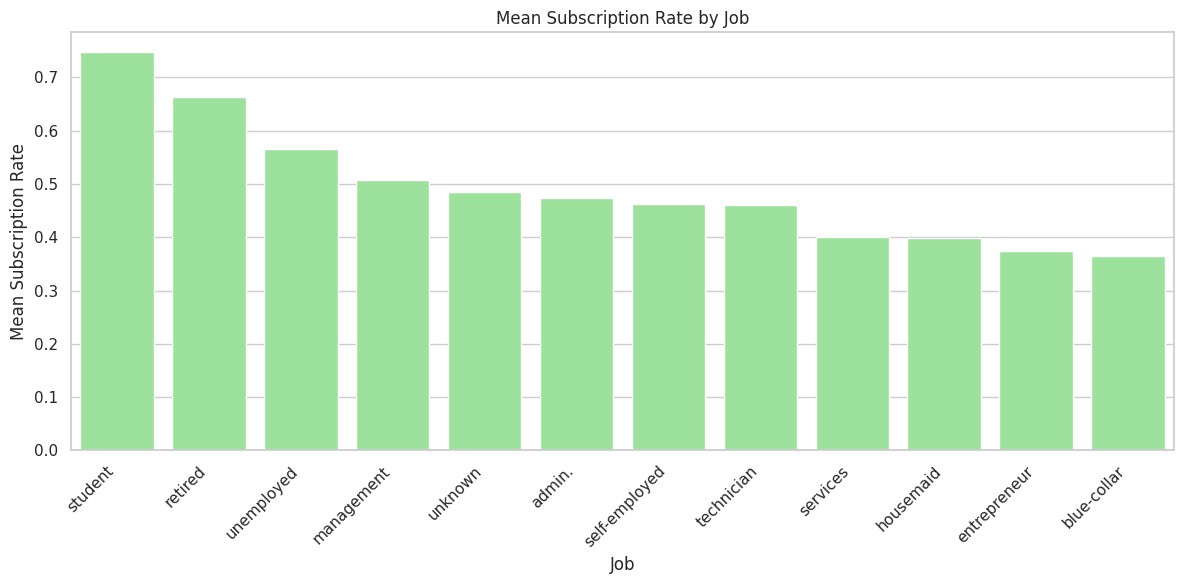

In [ ]:
# Convert 'deposit' column to numerical
df['deposit_numerical'] = df['deposit'].map({'yes': 1, 'no': 0})

# Calculate subscription rate per job
subscription_rate_per_job = df.groupby('job')['deposit_numerical'].mean().reset_index()

# Rename the column to reflect it's the subscription rate
subscription_rate_per_job.rename(columns={'deposit_numerical': 'subscription_rate'}, inplace=True)

# Print the subscription rates per job
print('Subscription Rates per Job:')
print(subscription_rate_per_job)

# Calculate the mean subscription rate per job
mean_subscription_per_job = df.groupby('job')['deposit_numerical'].mean().reset_index()

# Sort the mean subscription rate in descending order
mean_subscription_per_job = mean_subscription_per_job.sort_values(by='deposit_numerical', ascending=False)

# Set the style of the plot
sns.set(style="whitegrid")

# Plot the mean subscription rate per job with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='job', y='deposit_numerical', data=mean_subscription_per_job, color='lightgreen')
plt.title('Mean Subscription Rate by Job')
plt.xlabel('Job')
plt.ylabel('Mean Subscription Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
#Marriage Demographics
df['marital'].value_counts()

# Calculate subscription rate per marital status
subscription_rate_per_marital_status = df.groupby('marital')['deposit_numerical'].mean().reset_index()

# Rename the column to reflect it's the subscription rate
subscription_rate_per_job.rename(columns={'deposit_numerical': 'subscription_rate'}, inplace=True)

# Print the subscription rates per marital status
print('Subscription Rates per Marital Status:')
print(subscription_rate_per_marital_status)


Subscription Rates per Marital Status:
    marital  deposit_numerical
0  divorced           0.481052
1   married           0.433790
2    single           0.543491


In [ ]:
#Education demographics
df['education'].value_counts()

# Calculate subscription rate per level of education
subscription_rate_per_education = df.groupby('education')['deposit_numerical'].mean().reset_index()

# Rename the column to reflect it's the subscription rate
subscription_rate_per_education.rename(columns={'deposit_numerical': 'subscription_rate'}, inplace=True)

# Print the subscription rates per marital status
print('Subscription Rates per education:')
print(subscription_rate_per_education)

Subscription Rates per education:
   education  subscription_rate
0    primary           0.394000
1  secondary           0.447407
2   tertiary           0.541068
3    unknown           0.507042


From the demographics analysis, we can see that

*   Most customers have a management job.
*   Subscription rates are lowest among customers who work blue-collar jobs.
*   Students have the highest subscription rates followed closely by retired employees.

*  Mean subscription rate is higher in customers who are 18-25 and 66+ years.

*  Mean subscription rate is higher in customers who are single than those divorced and who are married.
*   Subsription rate is higher among customers who have a tertiary education and lowest in customers who only have a primary education.





## Grouping customers by various features

In [ ]:
#group customers to find subscription rates per group
grouped_data = df.groupby(['job', 'marital', 'education'])['deposit_numerical'].mean().reset_index()

# Rename the column to reflect it's the subscription rate
grouped_data.rename(columns={'deposit_numerical': 'subscription_rate'}, inplace=True)

print('Grouped Subscription Rates:')
print(grouped_data)

Grouped Subscription Rates:
         job   marital  education  subscription_rate
0     admin.  divorced    primary           0.500000
1     admin.  divorced  secondary           0.487805
2     admin.  divorced   tertiary           0.666667
3     admin.  divorced    unknown           0.333333
4     admin.   married    primary           0.225806
..       ...       ...        ...                ...
127  unknown   married   tertiary           0.200000
128  unknown   married    unknown           0.392857
129  unknown    single  secondary           0.500000
130  unknown    single   tertiary           0.750000
131  unknown    single    unknown           0.666667

[132 rows x 4 columns]


In [ ]:
# Convert 'deposit' column to numerical
df['deposit_numerical'] = df['deposit'].map({'yes': 1, 'no': 0})

# Calculate subscription rate per group
subscription_rate_per_group = df.groupby(['housing','default','loan'])['deposit_numerical'].mean().reset_index()

# Rename the column to reflect it's the subscription rate
subscription_rate_per_group.rename(columns={'deposit_numerical': 'subscription_rate'}, inplace=True)

# Print the subscription rates per job
print('Subscription Rates per Group:')
print(subscription_rate_per_group)


Subscription Rates per Group:
  housing default loan  subscription_rate
0      no      no   no           0.598963
1      no      no  yes           0.357022
2      no     yes   no           0.319149
3      no     yes  yes           0.235294
4     yes      no   no           0.376084
5     yes      no  yes           0.317734
6     yes     yes   no           0.343750
7     yes     yes  yes           0.304348


We can see that customers who have no housing loan, have not defaulted on any loan and have no other kind of loan have a higher subscription rate. It is therefore important to focus on these group of customers when doing campaigns to drive the subscription rates higher. Additionally, customers who have defaulted on a loan and have an active loan have lower subscription rates, so it could be wise to allocate very little resources to this group of customers in a marketing campaign.


Next, we want to see whether the type of contact used has an impact on subscription rates.

In [ ]:
# Calculate subscription rate per group
subscription_rate_per_group = df.groupby('contact')['deposit_numerical'].mean().reset_index()

# Rename the column to reflect it's the subscription rate
subscription_rate_per_group.rename(columns={'deposit_numerical': 'subscription_rate'}, inplace=True)

# Print the subscription rates per job
print('Subscription Rates per Group:')
print(subscription_rate_per_group)

Subscription Rates per Group:
     contact  subscription_rate
0   cellular           0.543273
1  telephone           0.503876
2    unknown           0.225916


We can see that customers who are reached through cellular networks have the highest subcription rates compared to the rest.

In [ ]:
# Calculate subscription rate per group
subscription_rate_per_group = df.groupby(['marital','poutcome'])['deposit_numerical'].mean().reset_index()

# Rename the column to reflect it's the subscription rate
subscription_rate_per_group.rename(columns={'deposit_numerical': 'subscription_rate'}, inplace=True)

# Print the subscription rates per job
print('Subscription Rates per Group:')
print(subscription_rate_per_group)

Subscription Rates per Group:
     marital poutcome  subscription_rate
0   divorced  failure           0.486726
1   divorced    other           0.642857
2   divorced  success           0.885714
3   divorced  unknown           0.429833
4    married  failure           0.485955
5    married    other           0.567273
6    married  success           0.922428
7    married  unknown           0.357577
8     single  failure           0.538462
9     single    other           0.558252
10    single  success           0.906166
11    single  unknown           0.489748


## Effect of Other Features on Subscription of Term Deposits

In [ ]:
import plotly.express as px

# Create a new column 'Balance' based on balance being above or below average
df['Balance'] = df['balance'].apply(lambda x: 'Above_Average' if x >= df['balance'].mean() else 'Below_Average')

# Group by 'Balance' and 'deposit', and calculate count and percentage
a = df.groupby(['Balance', 'deposit'], as_index=False)['age'].count().rename(columns={'age': 'Count'})
a['percent'] = round(a['Count'] * 100 / a.groupby('Balance')['Count'].transform('sum'), 1)
a['percent'] = a['percent'].apply(lambda x: '{}%'.format(x))

# Create a bar plot with data labels
fig = px.bar(a, x='Balance', y='Count', text='percent', color='deposit',
             barmode='group', template='simple_white',
             color_discrete_sequence=['Gray', 'LightGreen'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title='<b>Effect of Balance on Term Deposits</b>',
                  title_font_family='Times New Roman', title_x=0.08,
                  legend_title_text='<b>Deposit Status:</b>',
                  legend_orientation='h', legend_yanchor='bottom', legend_xanchor='right', legend_x=1.02, legend_y=1.02,
                  font_family='Times New Roman')
fig.update_traces(textposition='outside')
fig.show()


In [ ]:
#plot effect of duration on term deposit
df['Duration']=df['duration'].apply(lambda x: 'Above_Average_Duration' if x>=df['duration'].mean() else 'Below_Average_Duration')
a=df.groupby(['Duration','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('Duration')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='Duration',y='Count',text='percent',color='deposit',barmode='group',template='simple_white',color_discrete_sequence=['Gray','LightGreen'])
fig.update_layout(legend_title_text='<b>Deposit Status:</b>',title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Duration on Term Deposits</b><br><b style="font-family: Times New Roman; font-size:1.02vw">By taking the above average duration and below average duration</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_x=0.08,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.update_traces(textposition='outside')
fig.show()

In [ ]:
a=df.groupby(['poutcome','deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percentile']=round(a['Count']*100/a.groupby('poutcome')['Count'].transform('sum'),1)
a['percentile']=a['percentile'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='poutcome',y='Count',color='deposit',text='percentile',template='simple_white',barmode='group',color_discrete_sequence=['Gray','LightGreen'])
fig.update_layout(title_x=0.08,template='simple_white',showlegend=True,legend_title_text="Deposit",title_text='<b style="color:black; font-size:100%;">Term Deposits based on Outcome of Previous Marketing Campaign<br><b style="font-family: Times New Roman; font-size:1.0vw">% of term deposits opened based on the outcome of previous campaign',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),textposition = "outside")
fig.show()

There is a 91% chance customers will subscribe if the previous outcome was a success. There is a 50% chance customers will subscribe to term deposits if the previous outcome was a failure.

## **Prediction of Campaign Outcome**

We will use machine learning algorithms to try and predict the outcome of the marketing campaigns. In doing this, we also seek to understand which variables are the most important in predicting the outcome of a marketing campaign.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Convert categorical variables to binary features using one-hot encoding
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','deposit']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Standardize numerical features
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Split data into features and target variable
X = df_encoded.drop('deposit_yes', axis=1)  # Assuming 'deposit_yes' is the encoded target variable
y = df_encoded['deposit_yes']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_pred))

# Access feature importance
feature_importance = model.coef_[0]
sorted_indices = np.argsort(feature_importance)[::-1]
print("Feature Importance:")
for i in sorted_indices:
    print(f"{X.columns[i]}: {feature_importance[i]}")





              precision    recall  f1-score   support

       False       0.81      0.83      0.82      1166
        True       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233

Feature Importance:
poutcome_success: 2.1596601315904675
duration: 1.9158925605318908
month_mar: 1.7825469417579594
month_dec: 1.4245233182537158
month_oct: 1.071315774955922
month_sep: 1.0552338322584278
education_tertiary: 0.49871416219591125
job_student: 0.3628137717212356
month_jun: 0.34548015308709784
education_unknown: 0.32092070812570844
education_secondary: 0.23455942189105913
job_retired: 0.22227791638718317
balance: 0.07184642590541705
poutcome_other: 0.05706792405434248
day: 0.04617812015756834
previous: 0.03553634823710784
default_yes: -0.009317436769733421
marital_single: -0.029723441114660874
pdays: -0.03226186315113876
age: -0.033979962507834444
cont

From the model, the most important features in predicting the outcome of a campaign are:



*   Previous campaign outcome
*   Duration of the contact
*   Month the campaign was conducted

What the model tells us is that:



*   Customers whose previous marketing campaign was succesful are more likely to subscribe to term deposits. So when conducting future campaigns, it is important to consider this.
*   Customers who were contacted during specific months (March, October and December) are more likely to subscribe to term deposits.

*   Customers who were contacted for longer periods are more likely to subscribe to term deposits.












Accuracy: 0.8083296014330497
Confusion Matrix:
[[937 238]
 [190 868]]
Feature ranking:
1. feature 11 (0.591310)
2. feature 8 (0.129966)
3. feature 6 (0.067020)
4. feature 13 (0.049923)
5. feature 15 (0.038138)
6. feature 14 (0.037830)
7. feature 10 (0.026646)
8. feature 5 (0.025842)
9. feature 0 (0.017757)
10. feature 12 (0.007889)
11. feature 3 (0.005280)
12. feature 9 (0.002200)
13. feature 2 (0.000147)
14. feature 1 (0.000050)
15. feature 7 (0.000000)
16. feature 4 (0.000000)


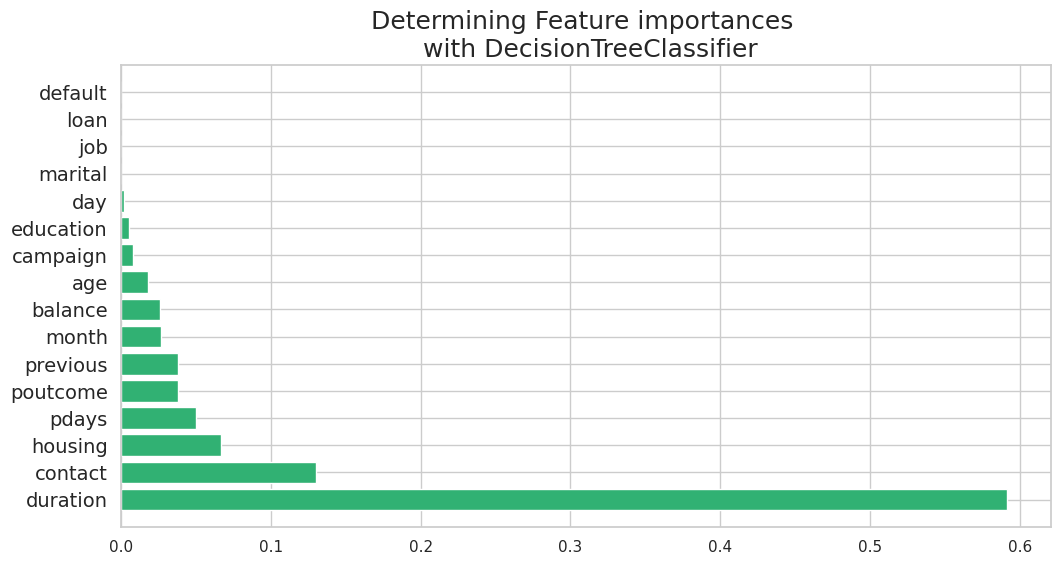

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# Set the style of the plot
sns.set(style="whitegrid")

# Convert the columns into categorical variables
df['job'] = df['job'].astype('category').cat.codes
df['marital'] = df['marital'].astype('category').cat.codes
df['education'] = df['education'].astype('category').cat.codes
df['contact'] = df['contact'].astype('category').cat.codes
df['poutcome'] = df['poutcome'].astype('category').cat.codes
df['month'] = df['month'].astype('category').cat.codes
df['default'] = df['default'].astype('category').cat.codes
df['loan'] = df['loan'].astype('category').cat.codes
df['housing'] = df['housing'].astype('category').cat.codes

# Let's create new splittings like before but now we modified the data so we need to do it one more time.
# Create train and test splits
target_name = 'deposit'
X = df.drop('deposit', axis=1)


label=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2, random_state=42, stratify=label)

# Build a classification task using 3 informative features
tree = tree.DecisionTreeClassifier(
    class_weight='balanced',
    min_weight_fraction_leaf = 0.01

)



tree = tree.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = tree.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


importances = tree.feature_importances_
feature_names = df.drop('deposit', axis=1).columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    #plt.axhline(y=1.85, xmin=0.21, xmax=0.952, color='k', linewidth=3, linestyle='--')
    #plt.text(0.30, 2.8, '46% Difference between \n duration and contacts', color='k', fontsize=15)

feature_importance_graph(indices, importances, feature_names)
plt.show()